# World Happiness Report 
### Lessons from the happiest countries in the world
Replicating the visualisation from the Economist article 'Lessons from the happiest countries in the world'

In [10]:
# Load table and amend column headers
import pandas
import numpy as np

happy_df = pandas.read_csv("Happiness Around the World Data.csv")
pop_GDP_df = pandas.read_csv("Data_Extract_From_World_Development_Indicators.csv")

#Rename DataFrame columns
happy_df.columns = ['Country', 'Life evaluation', 'Ranking', 'Region']
#pop_GDP_df.columns = ['Country', 'GDP per person ($)', 'Population']
pop_GDP_df.columns = ['Country', 'GDP', 'Population']

#Preview DataFrame headers
#print(happy_df.head())
#print(pop_GDP_df.head())


In [12]:
# Data Cleaning
# Amend Mexico to Latin America
# Replace variations with 'USA' in the 'country' column
happy_df['Country'] = happy_df['Country'].replace({
    'United States of America': 'USA',
    'United States': 'USA',
    'US': 'USA',
    'United Kingdom': 'UK',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Turkiye': 'Turkey',
    'Hong Kong SAR, China': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Viet Nam': 'Vietnam'
})
pop_GDP_df['Country'] = pop_GDP_df['Country'].replace({
    'United States of America': 'USA',
    'United States': 'USA',
    'US': 'USA',
    'United Kingdom': 'UK',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Turkiye': 'Turkey',
    'Hong Kong SAR, China': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Viet Nam': 'Vietnam'})
# print("Unique country names in happy_df:")
# print(happy_df['Country'].unique())
# print("\nUnique country names in pop_GDP_df:")
# print(pop_GDP_df['Country'].unique())

# Update the Region for Mexico
happy_df.loc[happy_df['Country'] == 'Mexico', 'Region'] = 'Latin America & the Caribbean'
#print(happy_df[happy_df['Country'] == 'Mexico'])


In [14]:
# investigate > delete rows with missing data
pop_GDP_df["GDP"] = pop_GDP_df["GDP"].replace("..", np.nan)
pop_GDP_df["Population"] = pop_GDP_df["Population"].replace("..", np.nan)
# print(happy_df.isna().sum())
# print(pop_GDP_df.isna().sum())
# print(happy_df)
# print(pop_GDP_df)
pop_GDP_df.dropna(inplace=True)
# print(pop_GDP_df[pop_GDP_df.isnull().any(axis=1)])

In [16]:
# Merge the two tables together 
df = pandas.merge(happy_df, pop_GDP_df)
#print(df.head())

# print info to confirm we have the right no of rows for the final df
# print(happy_df.info())
# print(pop_GDP_df.info)
# print(df.info())

# correcting data types and removing commas
df["GDP"] = df["GDP"].str.replace(",", "")
df["GDP"] = df["GDP"].replace("..", 0).astype(float)
df["Population"] = df["Population"].str.replace(",", "")
df["Population"] = df["Population"].replace("..", 0).astype(float)
#print(df.dtypes)

In [18]:
# Get country lists before and after
countries_df1 = set(happy_df['Country'].unique())
countries_df2 = set(pop_GDP_df['Country'].unique())
countries_merged = set(df['Country'].unique())

# Union of both input DataFrames (in case they contain different ones)
all_original_countries = countries_df1.union(countries_df2)

# Countries that got dropped
lost_countries = all_original_countries - countries_merged
print("Countries lost in merge:")
print(lost_countries)
# Countries that got dropped (just from the LE sheet)
#lost_countries = countries_df1 - countries_merged

Countries lost in merge:
{'Yemen', 'Taiwan', 'Kyrgyzstan', 'Slovakia', 'Low & middle income', 'Curacao', 'Qatar', 'Middle East & North Africa (IDA & IBRD countries)', 'Maldives', 'East Asia & Pacific (IDA & IBRD countries)', 'Cabo Verde', 'Republic of the Congo', 'St. Kitts and Nevis', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Congo, Dem. Rep.', 'Europe & Central Asia', 'Yemen, Rep.', 'Middle East & North Africa', 'Cayman Islands', 'West Bank and Gaza', 'Iran, Islamic Rep.', 'Bermuda', 'Channel Islands', 'Macao SAR, China', 'Early-demographic dividend', 'Belarus', 'The Democratic Republic of the Congo', 'Upper middle income', 'Lao PDR', 'Palestine', 'South Asia', 'East Asia & Pacific', 'Lower middle income', 'Middle income', 'Congo, Rep.', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Lebanon', 'Fiji', 'Djibouti', 'IDA blend', 'Sao Tome and Principe', 'Bahamas, The', 'Vanuatu', 'Latin America & Caribbean', 'Heavily indebted poor countries (HIPC)', 'Haiti', 'Dominica', '

### Re-formatting
Successfully created a df that contains Country, population, GDP per capita and GDP per person in log scale.
I've used .merge to create a summary df. We've gone from 147 rows in the Life Eval csv and 267 on the World Bank csv to just 124 entries on the summary.

We're missing some rows because of slight differences in naming conventions for some countries.
List of countries being lost in the merge due to naming errors:
Palestine', 'Yemen', 'Venezuela', 'Czech Republic', 'Egypt', 'Slovakia', 'Republic of the Congo', 'Vietnam', 'Gambia', 'Lebanon', 'Hong Kong', 'South Korea', "Côte d'Ivoire", 'Taiwan', 'Kyrgyzstan', 'Russia', 'The Democratic Republic of the Congo', 'Iran', 'United Kingdom of Great Britain and Northern Ireland', 'Laos', 'Turkey'
Can easily amend a few names above to get these back into the df - some larger bubbles we want on final plot.

As we're using the 2023 economic data, some entries will simply be missing data for that year. Given the focus on this project is visualisation, this isn't of major concern (mostly smaller countries). If needed, we could load in 2022 data and use LOCF to pull data for those countries.


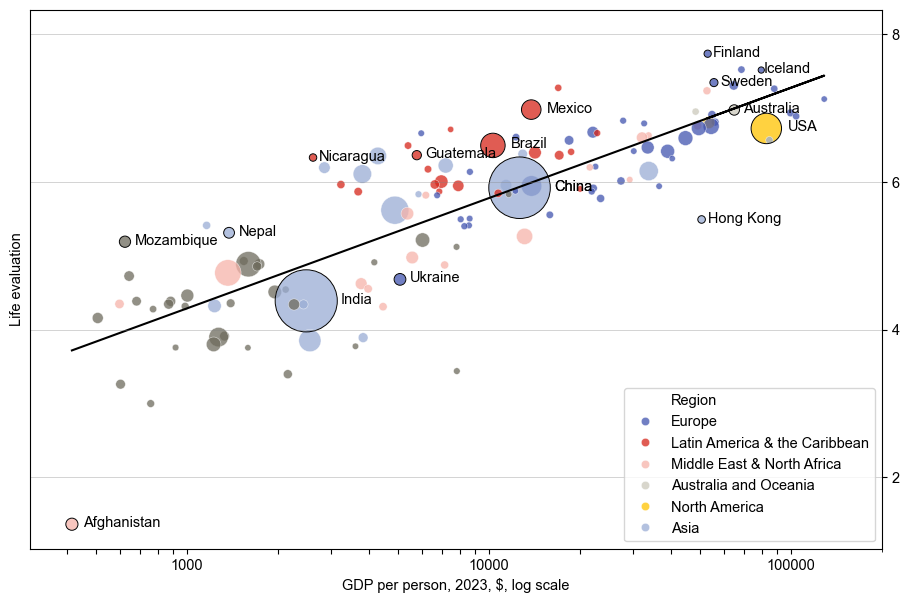

In [20]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

# Set the global default font
mpl.rcParams['font.family'] = "Arial"
mpl.rcParams['font.size'] = 10.5

# Add column log of gdp (for trendline)
df["log_GDP"] = np.log(df["GDP"])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(11, 7)) #10,6 also looked pretty good

# Define custom colors for each region
region_colors = {
    "Asia": "#9aadd5", #FF5733": # Red-Orange or "#F39C12" # Orange or maybe "#FFC300" # Yellow or even "#9aadd5" # Light Blue
    "Middle East & North Africa": "#f6b3aa",  # Salmon
    "Europe": "#4254af",  # Dark Blue "#9aadd5",  # Light Blue #6170bc OR #6070be" or darker: #4254af
    "North America": "#FFC300",  # Dark Blue or perhaps "#FFC300" # Yellow
    "Latin America & the Caribbean": "#d62519",  # Red #dc3d38 OR #d62519
    "Sub−Saharan Africa": "#6e6b5d",  # Dark Grey
    "Australia and Oceania": "#cbc9bc"  # Light Grey
}

# Create the scatter plot on the specified axis and with the custom palette
sns.scatterplot(data=df, x="GDP", y="Life evaluation", size="Population", hue="Region", palette=region_colors, 
                sizes=(20, 2000), legend="brief", ax=ax, alpha=0.75)

# Correct the legend; remove size
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(df["Region"].unique())], labels[:len(df["Region"].unique())], loc=4)

plt.xlabel("GDP per person, 2023, $, log scale")
plt.ylabel("")

# Define custom tick positions
tick_positions = np.concatenate([
    np.arange(100, 1000, 100),   # 100 to 1000 in steps of 100
    np.arange(1000, 10000, 1000), # 1000 to 10,000 in steps of 1000
    np.arange(10000, 100001, 10000) # 10,000 to 100,000 in steps of 10,000 # pushing to 100001 to make sure we include the tick lablel 100000.
])

# Define which tick labels should be visible
tick_labels = [""] * len(tick_positions)  # Empty labels for all ticks
for i, val in enumerate(tick_positions):
    if val in [1000, 10000, 100000]:  # Only show these labels
        tick_labels[i] = str(val)

# Apply log scale and set ticks with selective labels
plt.xscale("log")
plt.xticks(tick_positions, tick_labels)
# You can filter your tick labels to display only odd numbers using plt.yticks().
LE_odd = [2,4,6,8]
plt.yticks(LE_odd,LE_odd)
ax.yaxis.tick_right() # To move the y-axis labels to the right
plt.xlim(301, 200000) # zoom for broken axis


# Fit a linear trend line (degree=1 for a straight line)
coefficients = np.polyfit(df["log_GDP"], df["Life evaluation"], deg=1)
trend_line = np.poly1d(coefficients)
# Plot the trend line
plt.plot(df["GDP"], trend_line(df["log_GDP"]), color='black', label='Trend line')


# Add subtle horizontal grid lines
for y_value in [2, 4, 6, 8]:
    ax.axhline(y=y_value, color="gray", linestyle="solid", linewidth=0.6, alpha=0.4)

# Time to annotate!
countries_to_label = ["China", "USA", "Nicaragua", "Mozambique", "Nepal", "Congo", "Afghanistan", "Finland", "Iceland", "Sweden", "Guatemala", "Mexico", "Brazil", "Australia", "China", "Hong Kong", "Ukraine", "India"]
# Removed "Vietnam" from the list so annotations don't overlap. Consider removing Sweden too.

# Annotate selected points with refined font
#font = fm.FontProperties(family="Arial", size=11)  # Changing the global font instead up top.
for country in countries_to_label:
    subset = df[df["Country"] == country]
    if not subset.empty:
        x, y = subset["GDP"].values[0], subset["Life evaluation"].values[0]
        x_offset = (subset["Population"].values[0] ** (1/3)) / 45  # Adjust divisor as needed
        ax.annotate(
            country, (x, y),
            xytext=(x_offset, -2), textcoords="offset points",
            color="black")

# Highlight the annotated countries with a black outline
highlighted_points = df[df["Country"].isin(countries_to_label)]

# Overlay highlighted points with black outline
sns.scatterplot(data=highlighted_points, x="GDP", y="Life evaluation", size="Population", sizes=(20, 2000), edgecolor="black", facecolors="none", linewidth=0.7, ax=ax, alpha=1, legend=False)

# Show the graph
plt.show()

# Save a copy
fig.savefig("LE_scatterplot.png", dpi=300, bbox_inches="tight")



# Visual design
Successfully achieved initial scatterplot with the population variable as bubble size looking very similar to the Economist visual. Things to do:

- [DONE] Set the legend to the regions
- [DONE] Create a custom colour scheme to mirror the original
- [DONE] Add transparency to the bubbles
- [DONE] Re-label the scales
- [DONE] Set the x-axis interval ticks to be log-based as per the original - log the numbers of just the axis & cut off the 100-400 region so you start with Afghanistan
- [DONE] Set y-axis to odd numbers, drop the label and move to the right side
- Add h grid lines in the background for readability
- [DONE] Optional: add black outline to stand-out data points e.g. China and possibly even label them in-graph?
- [DONE] Stretch goal: Try and make annotations dynamic as to plot with an offset proportional to the population size. For reference, Mexico population = 129,739,759 looks pretty good as is with the static offset of 9. Brazil (population = 211140729.0) also looks pretty good. Respectively that would be a function of /14M and /23M. So let's try to divide each population by 20M and use that for the offset? In the end cube root, divide by 45 looked best.